# (2) PRAKTIKUM HIERARCHICAL CLUSTERING

## NAMA:Gishelawati

## NIM:10319046

***Catatan:***
1. Praktikum bersifat individual, namun berdiskusi secukupnya di dalam grup masing-masing
2. **Laporan final dalam format PDF** sebagai hasil konversi Notebook ke PDF dan disubmit di edunex. Bila ada slot informasi yang dapat dientry di edunex, tuliskan tautan ke Google Colab Notebook tersebut.

## Jenis-jenis Hierarchical Clustering (HC):
1. Agglomerative: pendekatan bottom-up. Diawali dengan anggapan setiap satu titik adalah satu cluster, lalu proses cluster merger berlanjut setelahnya hingga jumlah cluster menjadi satu.
2. Divisive: pendekatan top-bottom. Diawali dengan anggapan hanya ada satu cluster, lalu proses separatis berlanjut hingga jumlah cluster adalah sejumlah titik data.


### Algoritma Agglomerative Clustering:
1. Setiap satu titik data dianggap sebagai satu cluster
2. Ambil dua titik titik terdekat dan lakukan merger menjadi satu cluster
3. Ulangi langkah 2 hingga jumlah total cluster adalah 1

Beberapa contoh cara memilih titik-titik terdekat:
1. Ambil dua titik data dengan jarak terdekat (dan kedua terdekat)
2. Rerata jarak
3. Jarak centroid
4. Titik terjauh

Semua informasi jarak dan (hirarki) clustering di atas disimpan sebagai struktur data di dalam diagram bernama ***dendogram***. Pembatas (*threshold*) dapat dimanfaatkan dengan memperhatikan dendogram sehingga dapat diperoleh kesimpulan berapa jumlah cluster yang diperlukan.

### HC tidak direkomendasikan untuk dataset raksasa karena akan berat secara komputasional, harus menarget nilai hampiran dengan suku sisa berorde  $O(N^2 Log(N))$ (perhatikan faktor $N^2$)

### Perhatian:
Pada contoh kasus di bawah ini, akan dipelajari HC clustering pelanggan mall berdasarkan variabel ***penghasilan tahunan*** (indeks fitur ke-3) vs ***skor pengeluaran*** (indeks fitur ke-4). Di contoh persoalan ini, jarak yang sering berperan dalam clustering adalah ***jarak euclidean***.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')
print(df.head())

X = df.iloc[:, [3, 4]].values

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


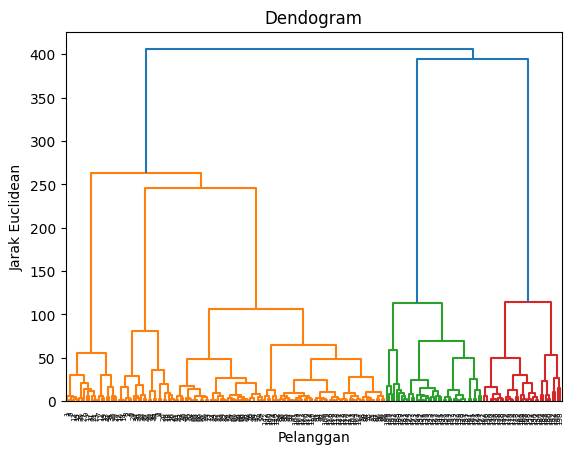

In [ ]:
# Using Dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward')) # The ward method tries to minimise the variance in each cluster
plt.title('Dendogram')
plt.xlabel('Pelanggan')
plt.ylabel('Jarak Euclidean')
plt.show()

#### Berdasarkan plot dendogram, berapa jumlah cluster yang disarankan?
*(Jawab dan tulis di sel ini: n_clusters = 5
  Berkaitan dengan pembatas / threshold jarak euclidean dan sebesar 150
)*

In [ ]:
# Fitting hierarchical clustering model
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

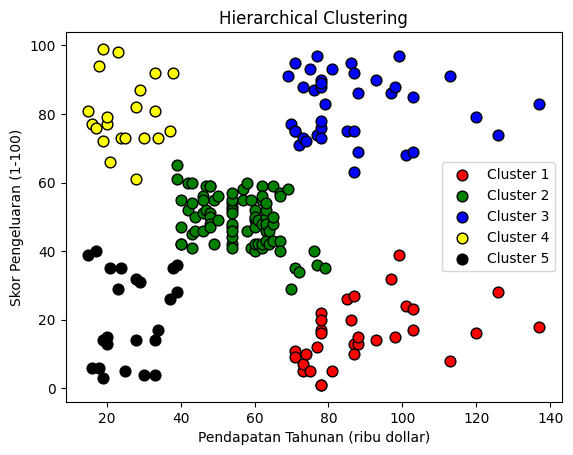

In [ ]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], color='red', s=60, label='Cluster 1', edgecolors='black')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], color='green', s=60, label='Cluster 2', edgecolors='black')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], color='blue', s=60, label='Cluster 3', edgecolors='black')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], color='yellow', s=60, label='Cluster 4', edgecolors='black')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], color='black',s=60, label='Cluster 5', edgecolors='black')

plt.legend()
plt.title('Hierarchical Clustering')
plt.xlabel('Pendapatan Tahunan (ribu dollar)')
plt.ylabel('Skor Pengeluaran (1-100)')
plt.show()

### Tugas:

Gunakan HC Clustering untuk ide clustering lain seperti yang disinggung di bagian Tugas di modul 1 clustering. Kerjakan secara lengkap seperti contoh latihan di atas.

HC clustering pelanggan mall berdasarkan variabel ***penghasilan tahunan*** (indeks fitur ke-3) vs ***age*** (indeks fitur ke-2).jarak yang sering berperan dalam clustering adalah ***jarak euclidean***.

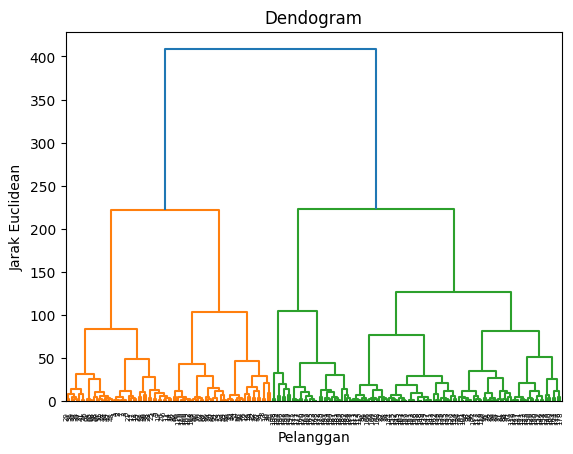

In [ ]:
Y = df.iloc[:, [2, 3]].values #2 age, 3 penghasilan tahunan

# Using Dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(Y, method='ward')) # The ward method tries to minimise the variance in each cluster
plt.title('Dendogram')
plt.xlabel('Pelanggan')
plt.ylabel('Jarak Euclidean')
plt.show()

In [ ]:
#n_clusters = 4, Berkaitan dengan pembatas / threshold jarak euclidean dan sebesar 150
# Fitting hierarchical clustering model
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(Y)
y_hc

array([3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       0, 1, 3, 3, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

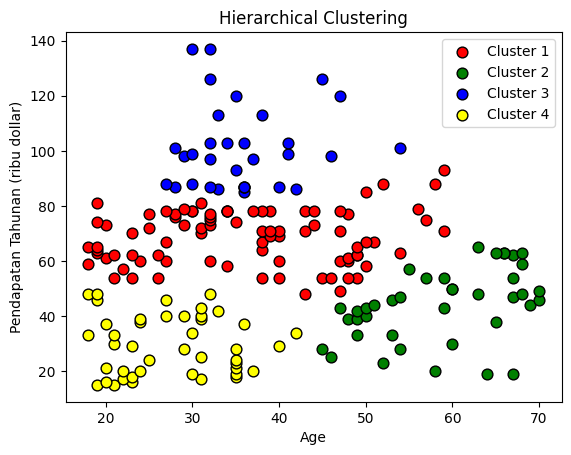

In [ ]:
plt.scatter(Y[y_hc == 0, 0], Y[y_hc == 0, 1], color='red', s=60, label='Cluster 1', edgecolors='black')
plt.scatter(Y[y_hc == 1, 0], Y[y_hc == 1, 1], color='green', s=60, label='Cluster 2', edgecolors='black')
plt.scatter(Y[y_hc == 2, 0], Y[y_hc == 2, 1], color='blue', s=60, label='Cluster 3', edgecolors='black')
plt.scatter(Y[y_hc == 3, 0], Y[y_hc == 3, 1], color='yellow', s=60, label='Cluster 4', edgecolors='black')

plt.legend()
plt.title('Hierarchical Clustering')
plt.ylabel('Pendapatan Tahunan (ribu dollar)')
plt.xlabel('Age')
plt.show()

HC clustering pelanggan mall berdasarkan variabel ***skor pengeluaran*** (indeks fitur ke-4) vs ***age*** (indeks fitur ke-2).jarak yang sering berperan dalam clustering adalah ***jarak euclidean***.

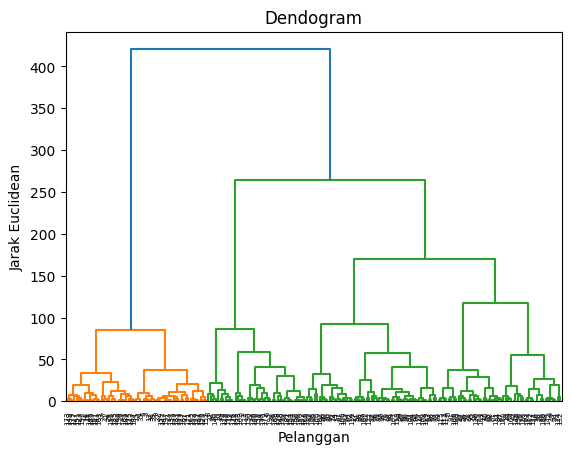

In [ ]:
Z = df.iloc[:, [2, 4]].values

# Using Dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(Z, method='ward')) # The ward method tries to minimise the variance in each cluster
plt.title('Dendogram')
plt.xlabel('Pelanggan')
plt.ylabel('Jarak Euclidean')
plt.show()

In [ ]:
#n_clusters = 4, Berkaitan dengan pembatas / threshold jarak euclidean dan sebesar 150
# Fitting hierarchical clustering model
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(Z)
y_hc

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3])

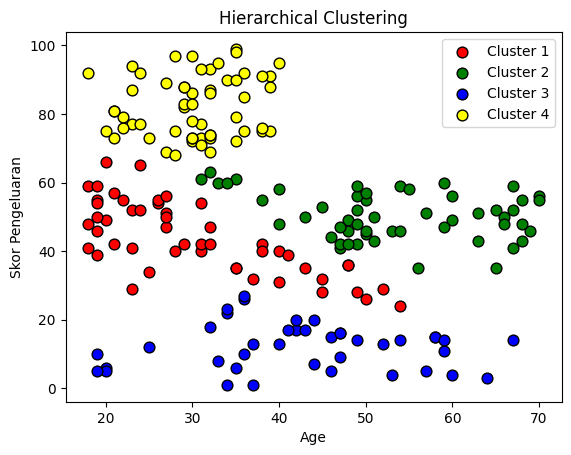

In [ ]:
plt.scatter(Z[y_hc == 0, 0], Z[y_hc == 0, 1], color='red', s=60, label='Cluster 1', edgecolors='black')
plt.scatter(Z[y_hc == 1, 0], Z[y_hc == 1, 1], color='green', s=60, label='Cluster 2', edgecolors='black')
plt.scatter(Z[y_hc == 2, 0], Z[y_hc == 2, 1], color='blue', s=60, label='Cluster 3', edgecolors='black')
plt.scatter(Z[y_hc == 3, 0], Z[y_hc == 3, 1], color='yellow', s=60, label='Cluster 4', edgecolors='black')

plt.legend()
plt.title('Hierarchical Clustering')
plt.xlabel('Age')
plt.ylabel('Skor Pengeluaran')
plt.show()